#📌 Extracción

In [1]:
import requests
import pandas as pd
import json

In [2]:
url = "https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/main/TelecomX_Data.json"

response = requests.get(url)
response.raise_for_status()  # Validación de la respuesta

data = response.json()

#🔧 Transformación

In [3]:
df = pd.json_normalize(data)
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [4]:
df.isnull().sum()

,0
customerID,0
Churn,0
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [5]:
# Columnas categóricas
cols_cat = df.select_dtypes(include='object').columns
df[cols_cat] = df[cols_cat].fillna("No informado")

# Columnas numéricas
cols_num = df.select_dtypes(include=['float64', 'int64']).columns
df[cols_num] = df[cols_num].fillna(0)

In [6]:
df['account.Charges.Total'] = pd.to_numeric(
    df['account.Charges.Total'], errors='coerce'
)

# Reemplazamos los NaN generados por 0
df['account.Charges.Total'] = df['account.Charges.Total'].fillna(0)

In [7]:
df.columns = df.columns.str.replace('.', '_')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

#📊 Carga y análisis

In [9]:
df.head()

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges_Monthly,account_Charges_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [10]:
df.describe()

,customer_SeniorCitizen,customer_tenure,account_Charges_Monthly,account_Charges_Total
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.162653,32.346498,64.720098,2277.182035
std,0.369074,24.571773,30.129572,2268.648587
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.425000,396.200000
50%,0.000000,29.000000,70.300000,1389.200000
75%,0.000000,55.000000,89.875000,3778.525000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
churn_rate = df['Churn'].value_counts(normalize=True) * 100
churn_rate

,proportion
Churn,
No,71.198569
Yes,25.719004
,3.082427


In [12]:
churn_by_contract = (
    df.groupby('account_Contract')['Churn']
    .value_counts(normalize=True) * 100
)

churn_by_contract

account_Contract  Churn
Month-to-month    No       55.430712
                  Yes      41.323346
                            3.245943
One year          No       86.043450
                  Yes      10.928242
                            3.028308
Two year          No       94.492255
                            2.753873
                  Yes       2.753873
Name: proportion, dtype: float64

In [13]:
churn_by_payment = (
    df.groupby('account_PaymentMethod')['Churn']
    .value_counts(normalize=True) * 100
)

churn_by_payment

account_PaymentMethod      Churn
Bank transfer (automatic)  No       80.931403
                           Yes      16.236627
                                     2.831970
Credit card (automatic)    No       82.270408
                           Yes      14.795918
                                     2.933673
Electronic check           No       52.924335
                           Yes      43.803681
                                     3.271984
Mailed check               No       78.318318
                           Yes      18.498498
                                     3.183183
Name: proportion, dtype: float64

In [14]:
df.groupby('Churn')['account_Charges_Monthly'].mean()

,account_Charges_Monthly
Churn,
,63.412277
No,61.265124
Yes,74.441332


In [15]:
df.groupby('Churn')['customer_tenure'].mean()

,customer_tenure
Churn,
,31.571429
No,37.569965
Yes,17.979133


In [16]:
df.to_csv("telecomx_clean.csv", index=False)

#📄Informe final

# Informe Final – Análisis de Churn en Telecom X

El presente análisis tiene como objetivo comprender los factores que influyen en la cancelación de clientes (Churn) en la empresa Telecom X.  
Para ello, se realizó un proceso ETL completo que incluyó la extracción de datos desde una API, su limpieza y transformación, y finalmente un análisis exploratorio.

## Proceso ETL

### Extracción
Los datos fueron obtenidos desde una API en formato JSON alojada en un repositorio de GitHub, utilizando la librería `requests`.

### Transformación
- Normalización de datos anidados
- Tratamiento diferenciado de valores nulos
- Conversión de tipos de datos numéricos
- Estandarización de nombres de columnas

### Carga
El dataset limpio fue exportado a un archivo CSV para su posterior análisis y reutilización.

## Análisis Exploratorio

A partir del análisis realizado, se observó que:

- Existe una proporción significativa de clientes que abandonan el servicio.
- Los contratos de tipo mensual presentan mayor tasa de churn.
- Los clientes con menor antigüedad tienden a cancelar más.
- Los cargos mensuales promedio son mayores en clientes que presentan churn.

## Visualizaciones y Hallazgos

Las visualizaciones permitieron identificar patrones claros asociados al churn:

- La distribución general muestra una proporción relevante de clientes que abandonan el servicio.
- Los contratos de tipo mensual presentan la mayor tasa de churn.
- Los clientes con cargos mensuales más elevados tienen mayor probabilidad de cancelar.
- A mayor antigüedad del cliente, menor es la probabilidad de churn.

Estos resultados refuerzan la importancia de estrategias de retención temprana y de incentivos para contratos de largo plazo.

## Conclusiones y Recomendaciones

- Incentivar contratos de largo plazo puede reducir la tasa de churn.
- Implementar estrategias de retención para clientes nuevos.
- Ofrecer beneficios o descuentos a clientes con cargos mensuales elevados.
- Analizar métodos de pago como posibles factores de cancelación.

Este análisis proporciona información clave para apoyar la toma de decisiones estratégicas orientadas a la retención de clientes.

In [17]:
import matplotlib.pyplot as plt

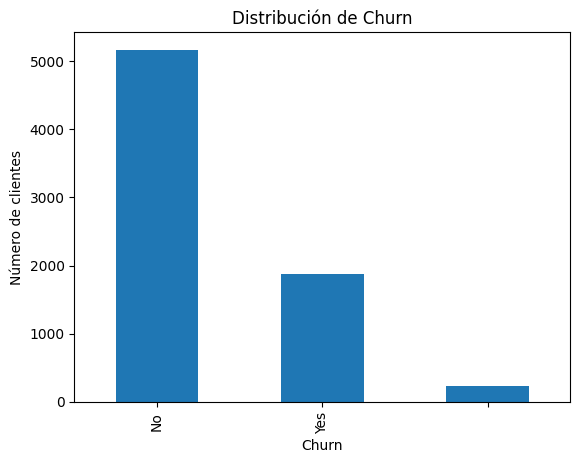

In [18]:
churn_counts = df['Churn'].value_counts()

plt.figure()
churn_counts.plot(kind='bar')
plt.title('Distribución de Churn')
plt.xlabel('Churn')
plt.ylabel('Número de clientes')
plt.show()

<Figure size 640x480 with 0 Axes>

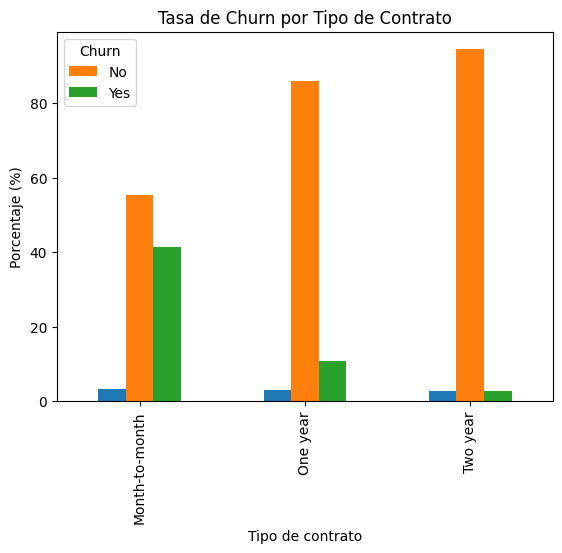

In [19]:
churn_contract = (
    df.groupby('account_Contract')['Churn']
    .value_counts(normalize=True)
    .unstack() * 100
)

plt.figure()
churn_contract.plot(kind='bar')
plt.title('Tasa de Churn por Tipo de Contrato')
plt.xlabel('Tipo de contrato')
plt.ylabel('Porcentaje (%)')
plt.legend(title='Churn')
plt.show()

<Figure size 640x480 with 0 Axes>

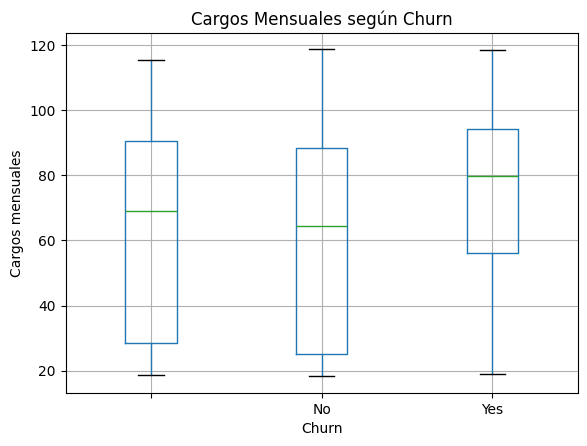

In [20]:
plt.figure()
df.boxplot(column='account_Charges_Monthly', by='Churn')
plt.title('Cargos Mensuales según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Cargos mensuales')
plt.show()

<Figure size 640x480 with 0 Axes>

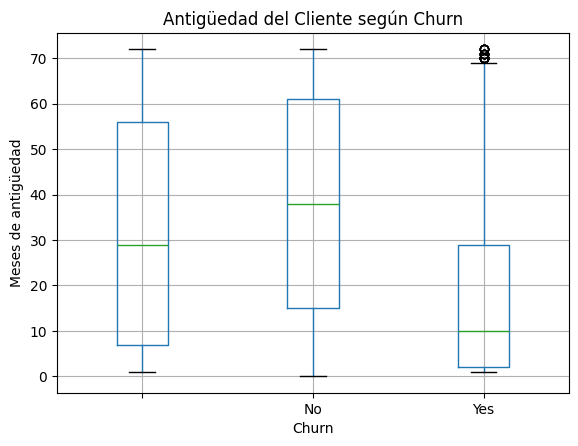

In [21]:
plt.figure()
df.boxplot(column='customer_tenure', by='Churn')
plt.title('Antigüedad del Cliente según Churn')
plt.suptitle('')
plt.xlabel('Churn')
plt.ylabel('Meses de antigüedad')
plt.show()